In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import glob
import os

In [3]:
sys.path.append('../')
from mlflow__func import mlflow_plots, mlflow_multiple_dirs

In [18]:
# TODO: make input file csv and read with e.g. pandas

# Simple way to get all relevant subdirs for mlflow plots
infile = '../mlflow/experiment_list.txt'
base_dir = '/lustre/storeB/project/fou/hi/foccus/experiments/'
with open(infile, 'r') as f:
    lines = f.readlines()

plot_dirs = []; titles = []
for line in lines:
    if not line.startswith('#') and line.split():
        exp_name = line.strip().split()[0]
        run_id_in = line.strip().split()[1]
        title = line.strip().split()[2]
        run_dir = base_dir + f'{exp_name}/logs/mlflow/*/{run_id_in}/*'
        # Expand the path to get all subdirs matching the pattern
        dirs = [d for d in glob.glob(run_dir) if os.path.isdir(d) and 'metrics' in d]
        # Read run_id from path
        run_id = [d.split('/')[-2] for d in dirs] 
        # Expand title list to same length, adding run_id to title if multiple dirs
        
        if len(dirs) > 1:
            sub_title = [title + ' (' + id[:5] + ')' for id in run_id]
        else:
            sub_title = [title]
        titles.extend(sub_title)
        plot_dirs.extend(dirs)
        #print(line.strip())

print(plot_dirs)
print(titles)
print(len(plot_dirs),len(titles))

['/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/logs/mlflow/409598793273254102/8c5377b99062407b9c3aea97c32ab4ce/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/9f98d0d274c842288609db0cd7765a5d/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/c3bcb3a8354b4de6ae940b1ff337f91b/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/b7a3ba5c3fc74264bed5b083c39d81ef/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/6959061b1670446eac08d48569aa4894/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/4bdc762816c94a1089a1be2d72fccb70/metrics', '/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/9a3bf31679c94296

In [ ]:
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/logs/mlflow/409598793273254102/8c5377b99062407b9c3aea97c32ab4ce/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/9f98d0d274c842288609db0cd7765a5d/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/c3bcb3a8354b4de6ae940b1ff337f91b/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/b7a3ba5c3fc74264bed5b083c39d81ef/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/6959061b1670446eac08d48569aa4894/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/4bdc762816c94a1089a1be2d72fccb70/metrics'
'/lustre/storeB/project/fou/hi/foccus/experiments/no-zeta/data-p1_model-p8/logs/mlflow/822450015467869168/9a3bf31679c94296bc3839dbbd142e9b/metrics'


In [ ]:
# TODO: 
# 1) add test to plot only experiments with steps > 0 or similar
# 2) plot many dirs together

In [38]:
mlflow_multiple_dirs(plot_dirs, titles, 1, suptitle='many dirs',plot_epoch=True)

ValueError: Key axes.prop_cycle: Cannot put cycle reference ('C0') in prop_cycler

['train_mse_loss_step', 'train_mse_loss_epoch', 'epoch', 'lr-AdamW', 'val_mse_inside_lam_metric', 'val_mse_loss_epoch', 'rollout', 'val_mse_loss_step']
train_mse_loss_step: Index 0
train_mse_loss_epoch: Index 1
epoch: Index 2
lr-AdamW: Index 3
val_mse_loss_epoch: Index 4
rollout: Index 5
val_mse_loss_step: Index 6
Successfully read in sfc_salinity.
Start of data:               ID       Vals  Step
0  1758541395914  64.775475    99
1  1758542193468  15.702889   199
2  1758542961499  11.383095   299
3  1758543692831   6.357231   399
4  1758544413098   4.436288   499
Successfully read in all.
Start of data:               ID       Vals  Step
0  1758541395914  16.247910    99
1  1758542193468   3.951899   199
2  1758542961499   2.861700   299
3  1758543692831   1.604034   399
4  1758544413098   1.124623   499
Successfully read in sfc_u_eastward.
Start of data:               ID      Vals  Step
0  1758541395914  0.016170    99
1  1758542193468  0.009732   199
2  1758542961499  0.008662   299
3

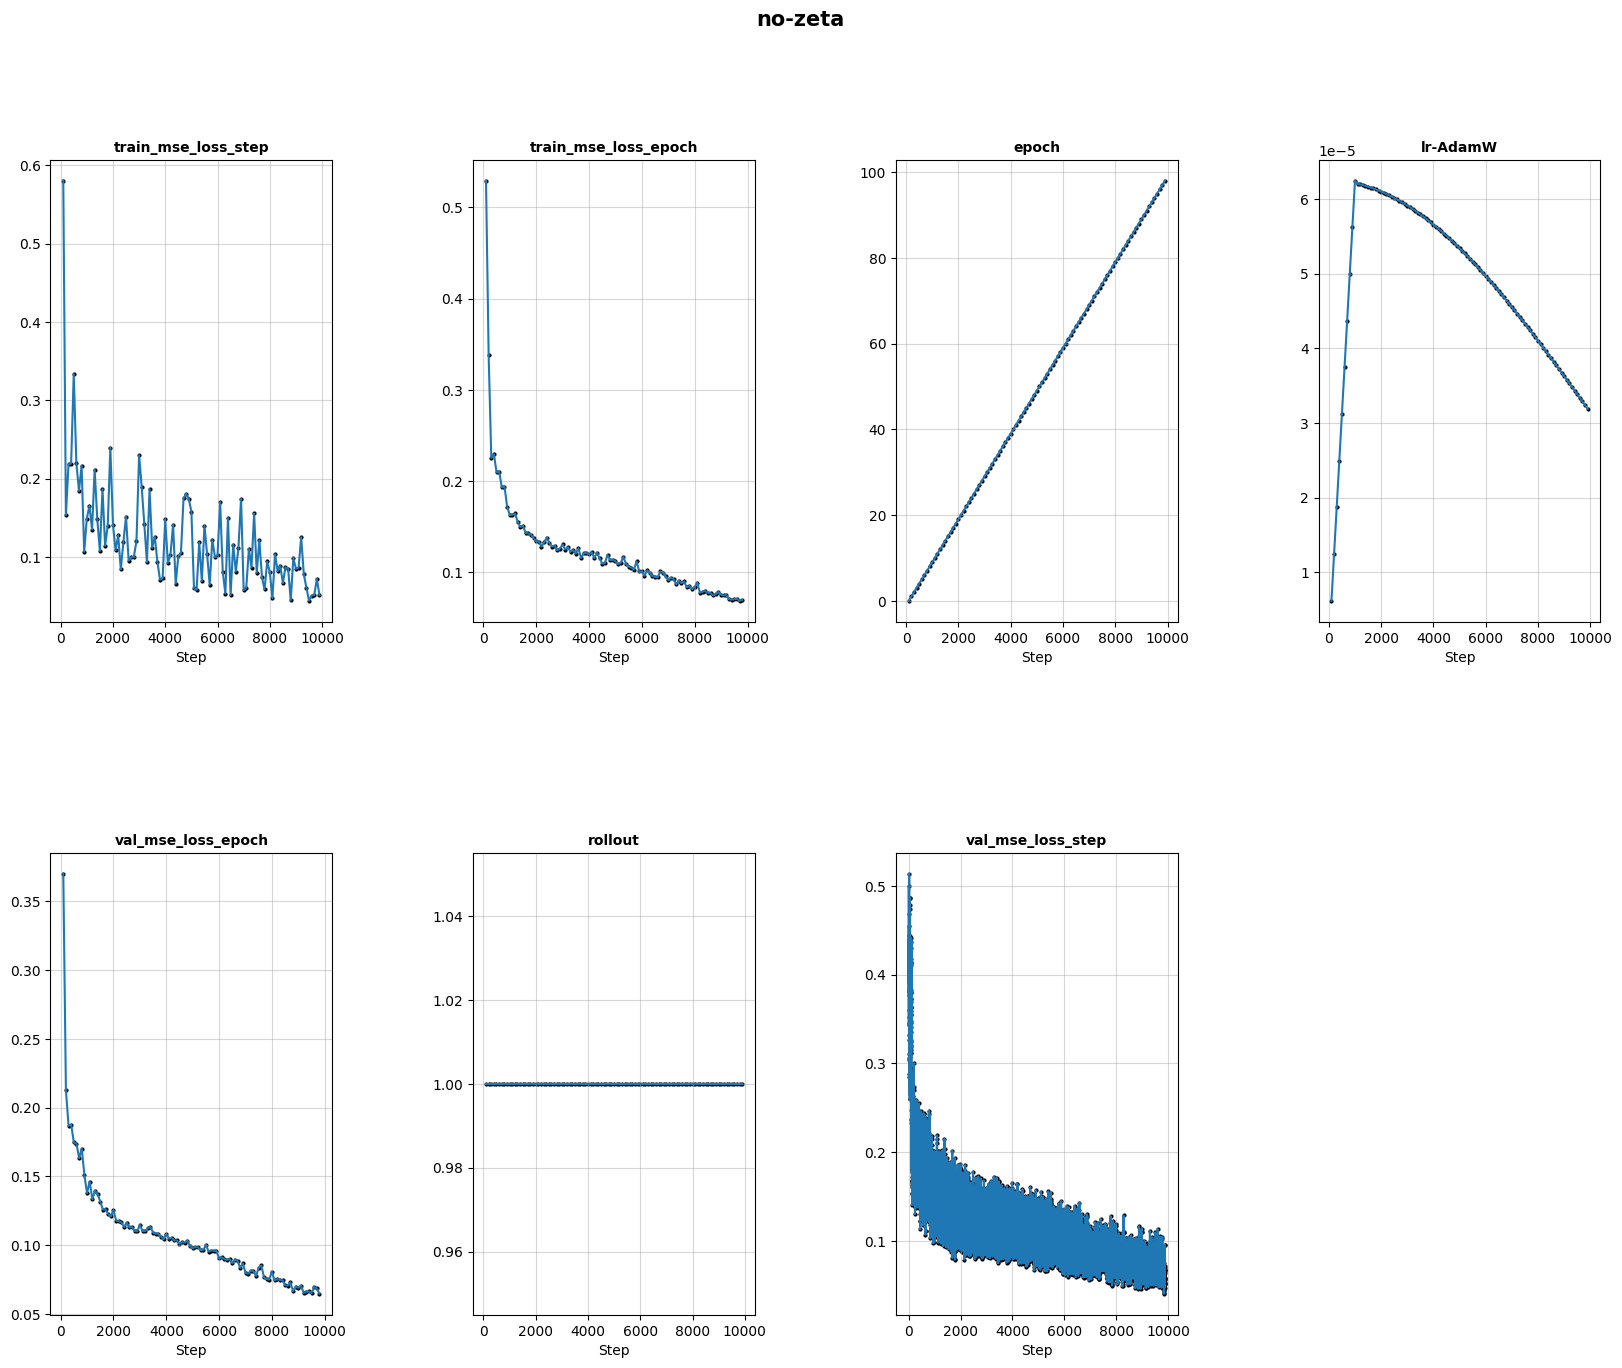

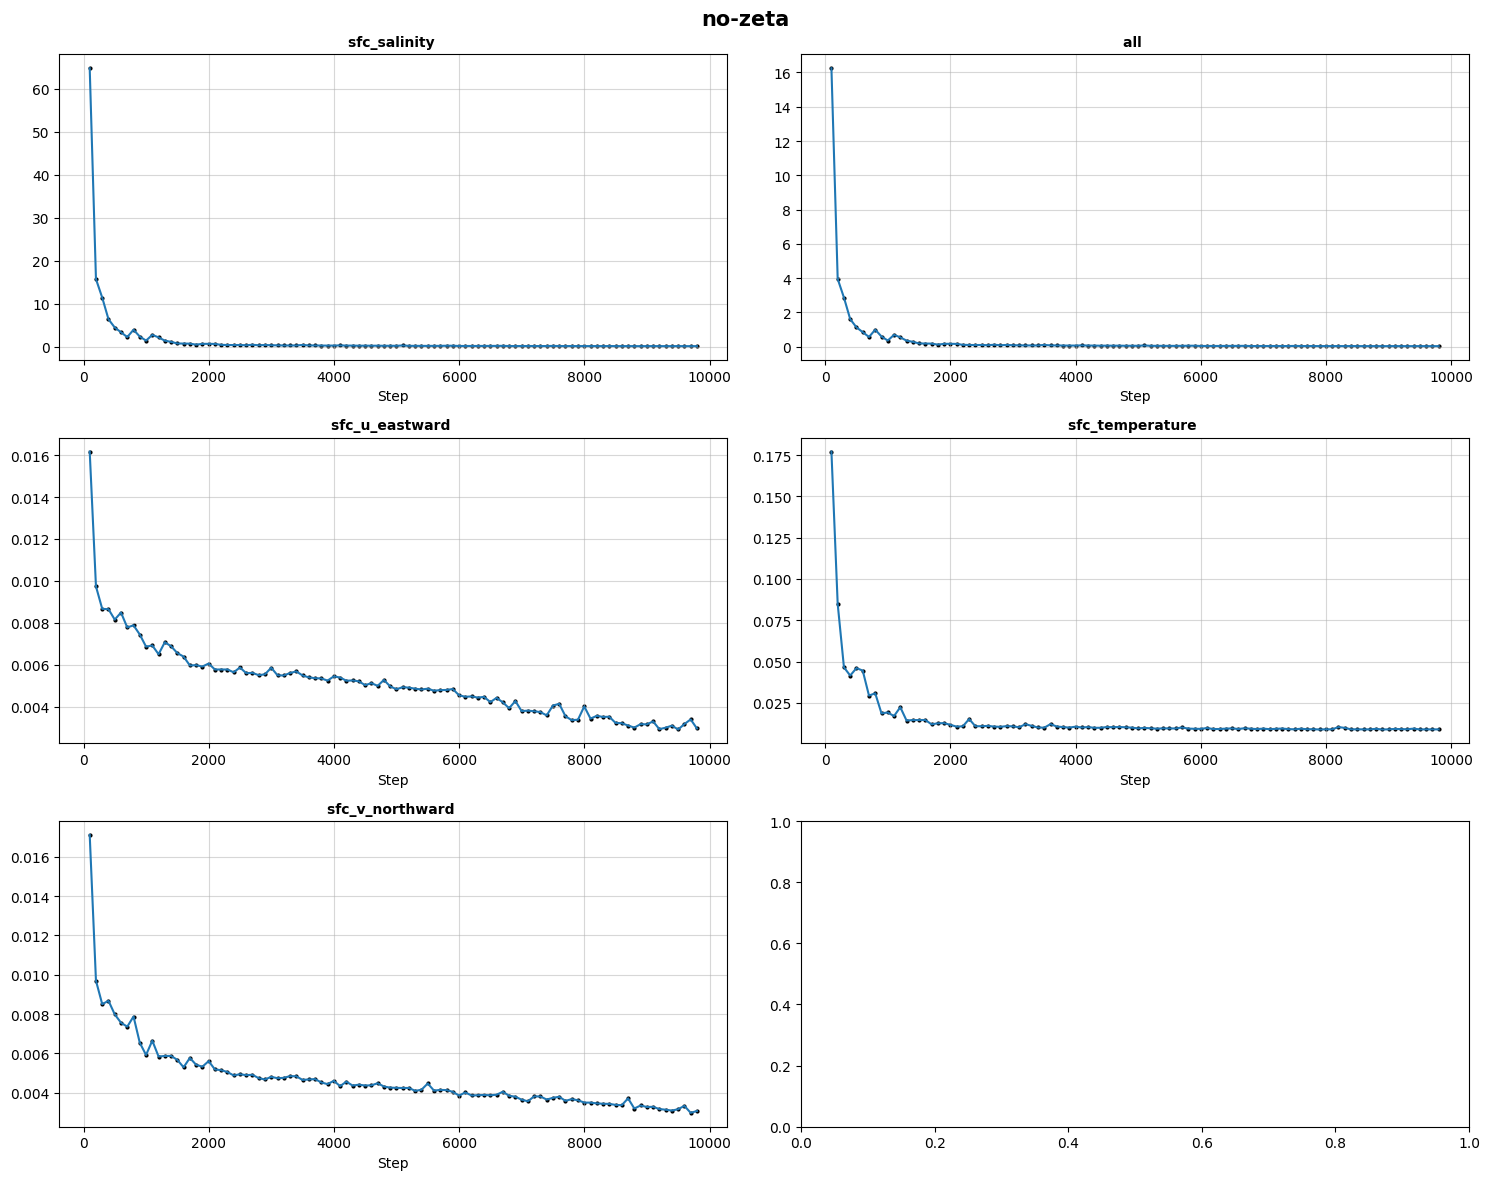

In [41]:

mlflow_plots(plot_dirs[2], 1, 'no-zeta')
